# Computing effect size

[Lakens et al. 2013](https://www.frontiersin.org/articles/10.3389/fpsyg.2013.00863/full)
> *Effect sizes are the **most important outcome** of empirical studies. Most articles on effect sizes highlight their importance to communicate the practical significance of results. For scientists themselves, effect sizes are most useful because they facilitate cumulative science. Effect sizes can be used to determine the sample size for follow-up studies, or examining effects across studies.*

## Dataset
We'll start by generating a fake demographic dataset representing the heights of 1000 individuals in two countries: France and the UK.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

np.random.seed(123)
nx, ny = 1000, 1000
x = np.random.normal(loc=174, size=nx) # mean = 174 cm, variance = 1
y = np.random.normal(loc=175, size=ny) # mean = 174 cm, variance = 1

# Now let's assemble these two variables in a single pandas Dataframe
group = np.r_[np.repeat(['France'], nx), np.repeat(['UK'], ny)]
df = pd.DataFrame({'DV': np.r_[x, y], 'Group': group })

Optionally, we can visualize the distribution of our two datasets using [seaborn](https://seaborn.pydata.org/)

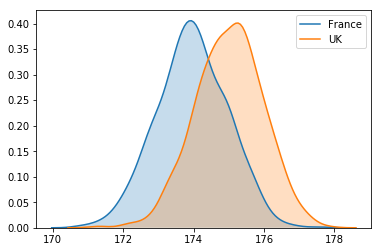

In [2]:
%matplotlib inline
import seaborn as sns
sns.kdeplot(x, shade=True, label='France')
sns.kdeplot(y, shade=True, label='UK')

## EFFECT SIZE COMPUTATION

#### The effect sizes currently supported are:

- Cohen's *d* for independant measures
- Cohen's *d-average* for repeated measures
- Hedges' *g* (better than Cohen's d for small sample size)
- Glass delta (more appropriate when the two measures have different variance, e.g. Control vs Patient group)
- Eta-square
- Odds-ratio
- Area Under the Curve (AUC)

In [3]:
from pingouin.effsize import *

eftype = 'hedges' # 'cohen', 'hedges', 'glass', 'eta-square', 'odds-ratio', 'AUC'

# 1 - using a pandas DataFrame
ef = compute_effsize(dv='DV', group='Group', data=df, eftype=eftype)
print(eftype, ': %.3f' % ef)

# 2 - using two NumPy arrays
ef = compute_effsize(x=x, y=y, eftype=eftype)
print(eftype, ': %.3f' % ef)

hedges : -1.069
hedges : -1.069


### Using a T-value
Alternatively, if you don't have the data, effect size can be computed from a T-value and sample size.

In [4]:
# 3 - using a T-value when nx and ny are known
T, _ = ttest_ind(x, y)
ef = compute_effsize_from_t(T, nx=len(x), ny=len(y), eftype=eftype)
print(eftype, '(from T - nx + ny): %.3f' % ef)

# 4 - using a T-value when only total sample size is known
T, _ = ttest_ind(x, y)
ef = compute_effsize_from_t(T, N=len(x) + len(y), eftype='cohen')
print('cohen (from T - only N): %.3f' % ef)

hedges (from T - nx + ny): -1.069
cohen (from T - only N): -1.069
